In [140]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import scipy.stats as ss

In [141]:
data = pd.read_csv('conversion.csv')
data.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [142]:
data.shape

(1143, 11)

In [143]:
data.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [144]:
data.xyz_campaign_id.nunique()

3

In [145]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

<Axes: xlabel='Impressions', ylabel='Count'>

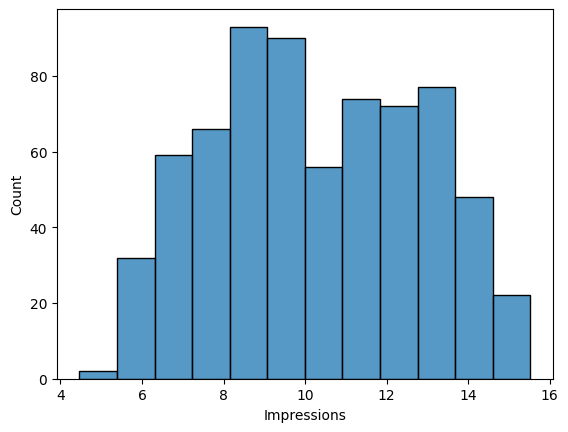

In [146]:
sns.histplot(np.log(data.groupby(['fb_campaign_id']).sum(('Impressions')).Impressions))

In [147]:
data['ctr'] = data.Clicks/data.Impressions
data.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [148]:
data.ctr.idxmax()
data.iloc[150]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
ctr                    0.001059
Name: 150, dtype: object

<Axes: xlabel='ctr', ylabel='Count'>

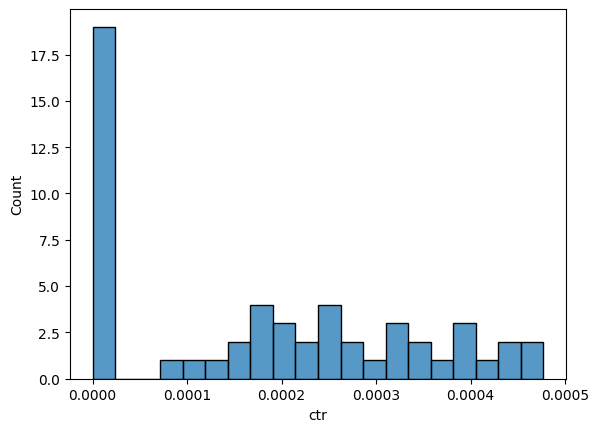

In [149]:
sns.histplot(data.query("xyz_campaign_id==916").ctr, bins=20)

In [150]:
data['cpc'] = data.Spent/data.Clicks
data.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

<Axes: >

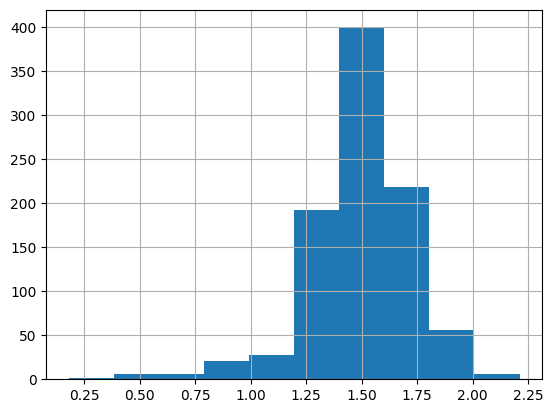

In [151]:
data.cpc.dropna().hist()

In [152]:
ss.iqr(data.cpc, nan_policy='omit')

0.2543636990499998

<ipython-input-153-9dafd8a83098>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query("gender == 'M'").cpc), sns.distplot(data.query("gender == 'F'").cpc)
<ipython-input-153-9dafd8a83098>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query("gender == 'M'").cpc), sns.distplot(data.

(<Axes: xlabel='cpc', ylabel='Density'>,
 <Axes: xlabel='cpc', ylabel='Density'>)

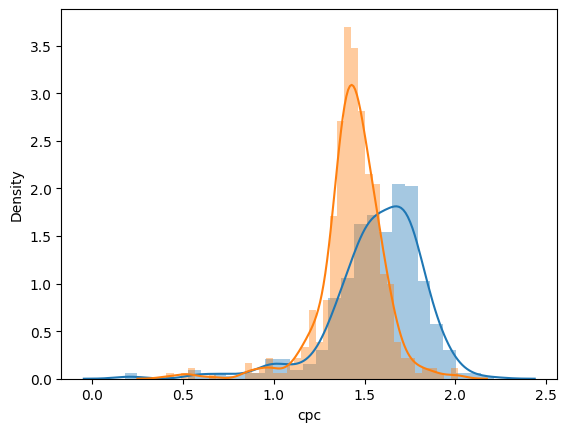

In [153]:
sns.distplot(data.query("gender == 'M'").cpc), sns.distplot(data.query("gender == 'F'").cpc)

In [177]:
data['conversion'] = (data.Approved_Conversion/data.Clicks)*100
data.conversion

0       100.000000
1         0.000000
2              NaN
3         0.000000
4       100.000000
           ...    
1138      0.793651
1139      0.000000
1140      0.000000
1141      1.481481
1142      1.754386
Name: conversion, Length: 1143, dtype: float64